In [38]:
from IPython.display import Image # resim import etmek için kullanırız.    Image(filename = "") ile ise resmi import ederiz.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
# makine öğrenmesi bilgisayarın ve verinin olduğu neredeyse her alan makine öğrenmesi için uygundur veri olduğu sürece. işlenebilir veri varsa makine öğrenmesi yapabiliriz.
# 

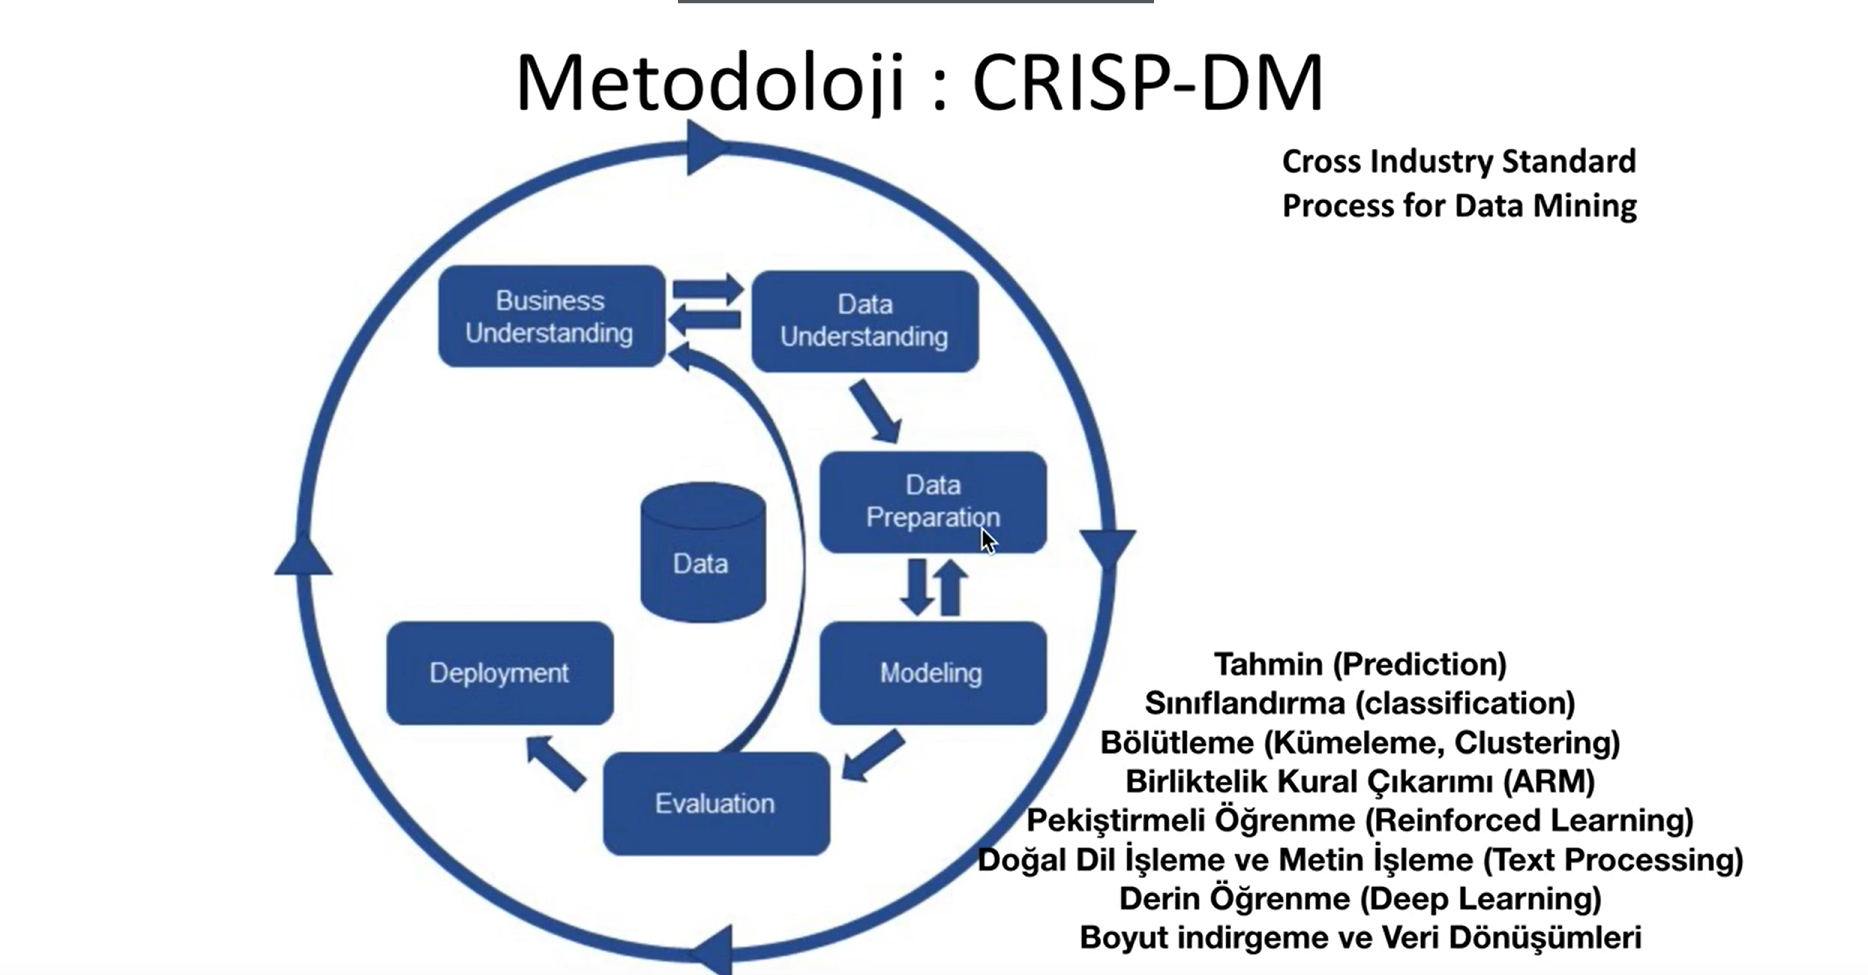

In [40]:
Image(filename="FOTO17.png")


In [6]:
df = pd.read_csv("bilkav.com_veriler.csv")
df #bazı makine öğrenmesi algoritmaları eksik verilerle çalışamaz bu yüzden önemli bir olaydır.

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [ ]:
# önce veriyi ön işlemek sonra makine öğrenmesi algoritması kurmak gerekir. 

In [7]:
boy = df["boy"]
boy # tek bir sutunu alırız bu yüzden elimize bir seri gelir. hepsinin değeri aynı tiptedir.

0     130
1     125
2     135
3     133
4     129
5     180
6     190
7     175
8     177
9     185
10    165
11    155
12    160
13    162
14    167
15    174
16    193
17    187
18    183
19    159
20    164
21    166
Name: boy, dtype: int64

In [10]:
boyKilo = df[["boy","kilo"]] #birden fazla olduğu için liste içersinde veririz aslında tek veri olsa bile liste içerisinde vermek mantıklıdır.
boyKilo.sort_values("boy",ascending=False)

,boy,kilo
16,193,90
6,190,80
17,187,80
9,185,105
18,183,88
5,180,90
8,177,60
7,175,90
15,174,70
14,167,62


In [11]:
df1 = pd.read_csv("bilkav.com_eksikveriler.csv")
df1 # görüldüğü gibi bazı yerlerde nan veriler var.

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e
5,tr,180,90,30.0,e
6,tr,190,80,25.0,e
7,tr,175,90,35.0,e
8,tr,177,60,22.0,k
9,us,185,105,33.0,e


In [12]:
# eksik verileri için kullanırız.
from sklearn.impute import SimpleImputer # imputer metotunu içeren class. sklearn içerisinden SimpleImputer'i getirdik.

In [13]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean") # np.nan olan verileri ne ile değiştireceğiz belirleriz. strategy ile ismi girilen metotu uygulatırız. her ortalama kendi kolonundaki nan verileri doldurur.
yas = df1.iloc[:,1:4].values
yas

array([[130.,  30.,  10.],
       [125.,  36.,  11.],
       [135.,  34.,  10.],
       [133.,  30.,   9.],
       [129.,  38.,  12.],
       [180.,  90.,  30.],
       [190.,  80.,  25.],
       [175.,  90.,  35.],
       [177.,  60.,  22.],
       [185., 105.,  33.],
       [165.,  55.,  27.],
       [155.,  50.,  44.],
       [160.,  58.,  nan],
       [162.,  59.,  41.],
       [167.,  62.,  55.],
       [174.,  70.,  47.],
       [193.,  90.,  nan],
       [187.,  80.,  27.],
       [183.,  88.,  28.],
       [159.,  40.,  29.],
       [164.,  66.,  32.],
       [166.,  56.,  42.]])

In [15]:
imputer = imputer.fit(yas[:,1:4]) # fit fonksiyonu öğretmek için kullanılır. 
yas[:,1:4] = imputer.transform(yas[:,1:4]) # fit eğitmek için kullanılır. transform ile öğrendiğini uygulatırız.
yas # görüldüğü gibi değerleri dönüştürdü.

array([[130.  ,  30.  ,  10.  ],
       [125.  ,  36.  ,  11.  ],
       [135.  ,  34.  ,  10.  ],
       [133.  ,  30.  ,   9.  ],
       [129.  ,  38.  ,  12.  ],
       [180.  ,  90.  ,  30.  ],
       [190.  ,  80.  ,  25.  ],
       [175.  ,  90.  ,  35.  ],
       [177.  ,  60.  ,  22.  ],
       [185.  , 105.  ,  33.  ],
       [165.  ,  55.  ,  27.  ],
       [155.  ,  50.  ,  44.  ],
       [160.  ,  58.  ,  28.45],
       [162.  ,  59.  ,  41.  ],
       [167.  ,  62.  ,  55.  ],
       [174.  ,  70.  ,  47.  ],
       [193.  ,  90.  ,  28.45],
       [187.  ,  80.  ,  27.  ],
       [183.  ,  88.  ,  28.  ],
       [159.  ,  40.  ,  29.  ],
       [164.  ,  66.  ,  32.  ],
       [166.  ,  56.  ,  42.  ]])

#### KATEGORİK VERİLER

In [16]:
# verileri sayısal ve kategorik olarak ikiye ayrılırlar.   mesela bir cinsiyet kolonu olsun.  bunlar kadın erkek trans lezbiyen vs olarak kategorik olarak ayrılsın. bu kategorik bir veridir.
# sayısal veriler mesela yaş kolonu maaş kolonu gibidir. üzerinde işlemler yapabiliriz.
# kategorik veriler nominal ve ordinal olarak ikiye bölünür. sayısal veriler ise oransal ve aralık olarak ikiye bölünür.

# nominal veriler sıralanamayan ve üzerinde işlem yapılamayan kategorik verilerdir.    ordinal veriler = bir ssıraya sokulabilen büyüktür küçüktür ilişkisi olabilen ama üzerinde operatör kullanılmayan.
    # kategorik verileri nasıl sayısal verilere çeviririz burası önemlidir. 
    
    
    

In [17]:
ulke = df1.iloc[:,0:1].values
ulke

array([['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr']], dtype=object)

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ulke[:,0] = le.fit_transform(df1.iloc[:,0])
ulke

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=object)

In [20]:
ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray() # bir arraya çevirir.
ulke 


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### VERİLERİN BİRLEŞMESİ

In [23]:
sonuc = pd.DataFrame(data = ulke,index=range(22),columns= ["fr","tr","us"])
sonuc

,fr,tr,us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [25]:
sonuc2 = pd.DataFrame(data=yas,index=range(22),columns=["boy","kilo","yas"])
sonuc2


,boy,kilo,yas
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


In [28]:
sonuc3 = pd.DataFrame(data=df1.iloc[:,-1],index=range(22),columns=["cinsiyet"])
sonuc3

,cinsiyet
0,e
1,e
2,k
3,k
4,e
5,e
6,e
7,e
8,k
9,e


In [31]:
birlesme = pd.concat([sonuc,sonuc2],axis=1) # axis = 1 olursa eğer sutun değerlerini birleştir demektir.
birlesme 

,fr,tr,us,boy,kilo,yas
0,0.0,1.0,0.0,130.0,30.0,10.00
1,0.0,1.0,0.0,125.0,36.0,11.00
2,0.0,1.0,0.0,135.0,34.0,10.00
3,0.0,1.0,0.0,133.0,30.0,9.00
4,0.0,1.0,0.0,129.0,38.0,12.00
5,0.0,1.0,0.0,180.0,90.0,30.00
6,0.0,1.0,0.0,190.0,80.0,25.00
7,0.0,1.0,0.0,175.0,90.0,35.00
8,0.0,1.0,0.0,177.0,60.0,22.00
9,0.0,0.0,1.0,185.0,105.0,33.00


In [32]:
birlesme2 = pd.concat([birlesme,sonuc3],axis = 1)
birlesme2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130.0,30.0,10.00,e
1,0.0,1.0,0.0,125.0,36.0,11.00,e
2,0.0,1.0,0.0,135.0,34.0,10.00,k
3,0.0,1.0,0.0,133.0,30.0,9.00,k
4,0.0,1.0,0.0,129.0,38.0,12.00,e
5,0.0,1.0,0.0,180.0,90.0,30.00,e
6,0.0,1.0,0.0,190.0,80.0,25.00,e
7,0.0,1.0,0.0,175.0,90.0,35.00,e
8,0.0,1.0,0.0,177.0,60.0,22.00,k
9,0.0,0.0,1.0,185.0,105.0,33.00,e


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(birlesme,sonuc3,test_size=0.33,random_state=0) # 0.33 diyerek yüzde 33'ün test için kullanılmasını sağladık geri kalanı ise train için kullanılacak.  random_state = rassal bölmenin nereden başlayacağı herkes aynı sayıyı girerse aynı değere ulaşırlar.
# x bağımsız değişkenler y ise bağımlı değişkenlerdir.  yani y x'e göre değişen verilerdir. buna göre bilgileri alarak öğrenir.


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # bir nesne oluşturduk.

In [37]:
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

array([[ 1.29099445, -0.37796447, -1.        ,  0.47240026,  1.32853794,
        -0.24991255],
       [-0.77459667, -0.37796447,  1.        ,  0.54952683,  0.20439045,
        -0.64977262],
       [-0.77459667, -0.37796447,  1.        ,  0.70377998,  0.91975703,
         1.58944379],
       [-0.77459667, -0.37796447,  1.        ,  0.31814711,  0.61317136,
         0.46983559],
       [-0.77459667,  2.64575131, -1.        , -2.53553608, -1.73731884,
        -1.92932485],
       [ 1.29099445, -0.37796447, -1.        ,  0.6266534 ,  0.30658568,
         0.5498076 ],
       [-0.77459667, -0.37796447,  1.        , -0.2217389 , -0.30658568,
         0.70975163],
       [ 1.29099445, -0.37796447, -1.        ,  0.08676739, -1.32853794,
        -0.48982859]])